In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical



In [3]:


# Constants
IMAGE_SIZE = (128, 128)
NUM_CLASSES = 6 # Assuming 3 classes: diseased, healthy, and others
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.001



In [4]:


# Function to load and preprocess images
def load_and_preprocess_data(data_dir):
    images = []
    labels = []
    classes = os.listdir(data_dir)
    num_classes = len(classes)
    
    for class_id, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for image_file in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_file)
            image = load_img(image_path, target_size=IMAGE_SIZE)
            image = img_to_array(image) / 255.0  # Normalize pixel values to [0, 1]
            images.append(image)
            labels.append(class_id)
    
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels



In [5]:


# Load and preprocess data
data_dir = r'C:\Users\jeeva P\OneDrive\Desktop\rice disease detection\archive (6)\RiceLeafsDisease\train'
images, labels = load_and_preprocess_data(data_dir)



In [6]:


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)



In [7]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)


In [8]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])


In [9]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
# Train model
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.1)

Epoch 1/20
48/48 [==============================] - 21s 398ms/step - loss: 1.6892 - accuracy: 0.3181 - val_loss: 1.3804 - val_accuracy: 0.4048
Epoch 2/20
48/48 [==============================] - 18s 381ms/step - loss: 1.2649 - accuracy: 0.5456 - val_loss: 1.1066 - val_accuracy: 0.6012
Epoch 3/20
48/48 [==============================] - 19s 387ms/step - loss: 1.0378 - accuracy: 0.6131 - val_loss: 0.8437 - val_accuracy: 0.6786
Epoch 4/20
48/48 [==============================] - 19s 388ms/step - loss: 0.9597 - accuracy: 0.6303 - val_loss: 0.8708 - val_accuracy: 0.6310
Epoch 5/20
48/48 [==============================] - 19s 388ms/step - loss: 0.8327 - accuracy: 0.6832 - val_loss: 0.6978 - val_accuracy: 0.7321
Epoch 6/20
48/48 [==============================] - 19s 403ms/step - loss: 0.7571 - accuracy: 0.7143 - val_loss: 0.6856 - val_accuracy: 0.7738
Epoch 7/20
48/48 [==============================] - 19s 394ms/step - loss: 0.7022 - accuracy: 0.7493 - val_loss: 0.5977 - val_accuracy: 0.7798

In [11]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


14/14 [==============================] - 1s 61ms/step - loss: 0.4592 - accuracy: 0.8286
Test Loss: 0.4592415988445282, Test Accuracy: 0.8285714387893677


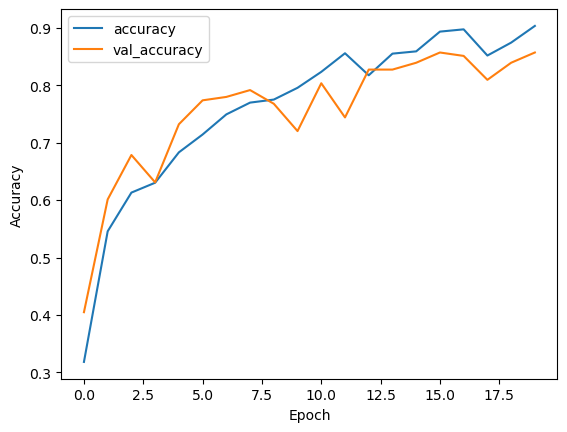

In [12]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [13]:
model.save(r'C:\Users\jeeva P\Videos\model.h5')

In [14]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model


In [15]:
# Constants
IMAGE_SIZE = (128, 128)

In [16]:
# Function to preprocess a single image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=IMAGE_SIZE)
    image = img_to_array(image) / 255.0  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

In [17]:
# Load the trained model
model = load_model(r"C:\Users\jeeva P\Videos\model.h5")


In [18]:
# Path to the image you want to make predictions on
image_path = r"C:\Users\jeeva P\Videos\rice disease\archive (6)\RiceLeafsDisease\train\leaf_scald\leaf_scald (5).jpg"

In [19]:
# Preprocess the image
image = preprocess_image(image_path)


In [20]:
# Make predictions
predictions = model.predict(image)


1/1 [==============================] - 0s 64ms/step


In [21]:
# Get the predicted class label
predicted_class = np.argmax(predictions)

In [22]:
# Mapping class indices to class names
class_names = {0: "bacterial_leaf_blight", 1: "brown_spot", 2: "healthy" , 3: "leaf_blast", 4: "leaf_scald", 5: "narrow_brown_spot"}  # Update with your actual class names


In [23]:
# Print the predicted class label
print("Predicted class:", class_names[predicted_class])

Predicted class: leaf_scald


In [24]:


if predicted_class == 0:
    print("recommend bacterial leaf blight pesticides")
elif predicted_class == 1:
    print("recommend brown spot pesticides")
elif predicted_class == 2:
     print("no pesticides")
elif predicted_class == 3:
    print("recommend leaf blast pesticides")
elif predicted_class == 4:
     print("recommend leaf scald pesticides")
elif predicted_class == 5:
     print("recommend narrow brown spot pesticides")
else:
    print("plz upload the clear image or another image in order to get correct recommendation pesticides")



recommend leaf scald pesticides
